# Social Media and Health

Github Repository Link: https://github.com/Emzy-Code/ec-a1

Original Source: https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data

## Data Summary

The "Social Media and Mental Health" dataset consists of 481 anonymised survey answers about social media usage, mental health questions, and other general data, and was used for "Does time spent on Social Media affect Mental Health? A Correlational Study (2022)".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

path = "smmh.csv"
dataframe = pd.read_csv(path)
warnings.filterwarnings('ignore')

In [2]:
dataframe.head()


,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


## Data Cleaning
A lot of these column names are quite lengthy. Let's change them.

In [3]:
rename = {"1. What is your age?": "Age",
          "2. Gender": "Gender",
        "8. What is the average time you spend on social media every day?": "Screen_Time", 
          "20. On a scale of 1 to 5, how often do you face issues regarding sleep?": "Sleep_Qual" , 
          "7. What social media platforms do you commonly use?": "Platform",
          "3. Relationship Status": "Relationship",
          "4. Occupation Status": "Occupation",
          "5. What type of organizations are you affiliated with?": "Organization",
          "6. Do you use social media?": "SM_Use",
          "18. How often do you feel depressed or down?": "Depression",
          "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?": "Daily_Interest",
          "13. On a scale of 1 to 5, how much are you bothered by worries?" : "Worries",
          "17. How often do you look to seek validation from features of social media?": "Validation_Seeking",
          "9. How often do you find yourself using Social media without a specific purpose?":"Doom_Scroll",
          "11. Do you feel restless if you haven't used Social media in a while?":"Restless",
          "10. How often do you get distracted by Social media when you are busy doing something?":"SM_Distract",
          "12. On a scale of 1 to 5, how easily distracted are you?": "Distract",
          "14. Do you find it difficult to concentrate on things?" : "Concentrate",
          "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?": "Compare",
          "16. Following the previous question, how do you feel about these comparisons, generally speaking?":"Feel"

         }
df =dataframe
df.rename(columns = rename,inplace=True)


In [4]:
df.head()

,Timestamp,Age,Gender,Relationship,Occupation,Organization,SM_Use,Platform,Screen_Time,Doom_Scroll,...,Restless,Distract,Worries,Concentrate,Compare,Feel,Validation_Seeking,Depression,Daily_Interest,Sleep_Qual
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Twitter is called X now, so I'm changing that too. 

In [5]:
platform = df[df["Platform"].str.contains("Twitter")]

platform["Platform"] = platform["Platform"].str.replace("Twitter", "X")
platform["Platform"]

df.update(platform)
df["Platform"].head()

0    Facebook, X, Instagram, YouTube, Discord, Reddit
1    Facebook, X, Instagram, YouTube, Discord, Reddit
2             Facebook, Instagram, YouTube, Pinterest
3                                 Facebook, Instagram
4                        Facebook, Instagram, YouTube
Name: Platform, dtype: object

## Social Media Usage

In [6]:
unique_screen = df["Screen_Time"].unique()
unique_screen

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

Here I took the middle point of each of these survey answer ranges, however that of course adds uncertainty to analysis, especially as "more than 5 hours" is a broad category

In [7]:


numerical_values = [2.5, 5.5, 3.5, 0.5, 1.5, 4.5]
screen = df
for i in range(len(unique_screen)):
    data = df[df["Screen_Time"]==unique_screen[i]]
    data["Screen_Time"] = numerical_values[i]
    screen.update(data)
    
screen.head()

,Timestamp,Age,Gender,Relationship,Occupation,Organization,SM_Use,Platform,Screen_Time,Doom_Scroll,...,Restless,Distract,Worries,Concentrate,Compare,Feel,Validation_Seeking,Depression,Daily_Interest,Sleep_Qual
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, X, Instagram, YouTube, Discord, Reddit",2.5,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, X, Instagram, YouTube, Discord, Reddit",5.5,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3.5,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",5.5,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2.5,3,...,4,4,5,5,3,3,3,4,4,1


### Histogram

(array([ 34.,  70., 101.,  93.,  67., 116.]),
 array([0.5       , 1.33333333, 2.16666667, 3.        , 3.83333333,
        4.66666667, 5.5       ]),
 <BarContainer object of 6 artists>)

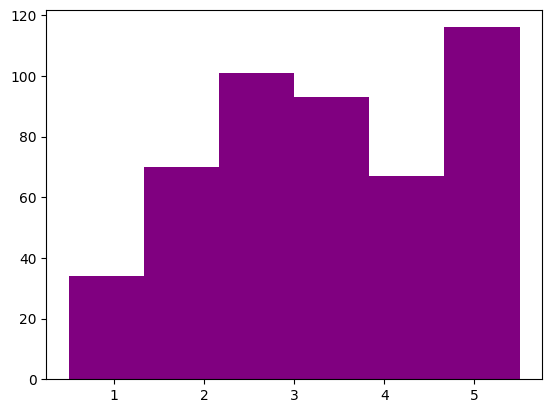

In [8]:
plt.hist(screen["Screen_Time"], bins=6, color="purple")

The histogram has many results for over 5 hours, likely due to the fact that it is a broad range and some might use social media for most of the day (or night). There are 19 hours of a day not accounted for in this survey.

(array([  5.,   4.,   3.,  10.,  16.,  12.,  22.,  46.,  24.,  73.,  46.,
        119., 149., 114., 211., 250., 142., 326., 311., 185., 401., 185.,
        368., 363., 146., 303., 275., 102., 223., 178.,  72.,  95.,  49.,
         58.,  43.,  17.,  21.,   8.,   8.,   7.,   5.,   3.,   1.,   1.]),
 array([2.72      , 2.75272727, 2.78545455, 2.81818182, 2.85090909,
        2.88363636, 2.91636364, 2.94909091, 2.98181818, 3.01454545,
        3.04727273, 3.08      , 3.11272727, 3.14545455, 3.17818182,
        3.21090909, 3.24363636, 3.27636364, 3.30909091, 3.34181818,
        3.37454545, 3.40727273, 3.44      , 3.47272727, 3.50545455,
        3.53818182, 3.57090909, 3.60363636, 3.63636364, 3.66909091,
        3.70181818, 3.73454545, 3.76727273, 3.8       , 3.83272727,
        3.86545455, 3.89818182, 3.93090909, 3.96363636, 3.99636364,
        4.02909091, 4.06181818, 4.09454545, 4.12727273, 4.16      ]),
 <BarContainer object of 44 artists>)

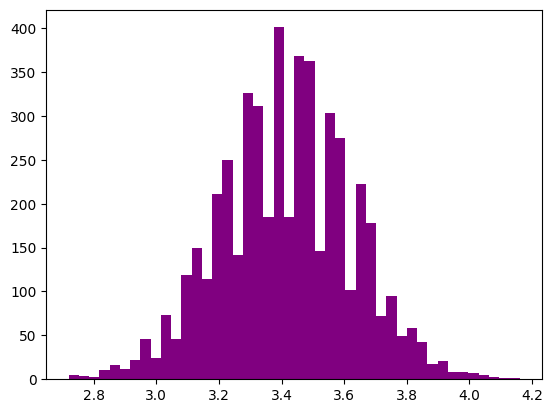

In [9]:
screen_series =screen["Screen_Time"]
sample_means50 = [screen_series.sample(50).mean() for i in range(0, 5000)]
plt.hist(sample_means50, bins="auto", color="purple")

## Social Media and Sleep Quality

In [10]:
screen_sleep = screen[["Screen_Time","Sleep_Qual"]]
screen_sleep.head()


,Screen_Time,Sleep_Qual
0,2.5,5
1,5.5,5
2,3.5,5
3,5.5,2
4,2.5,1


In [11]:
means = []
for i in range(1,6):  
    means.append(screen_sleep[screen_sleep["Sleep_Qual"]==i].mean()[0])
    # ^for all Sleep_Qual == i, calculate the mean of time and append to means

means_array = np.array(means)
means_array

array([2.95348837, 3.21428571, 3.52898551, 3.39090909, 3.812     ])

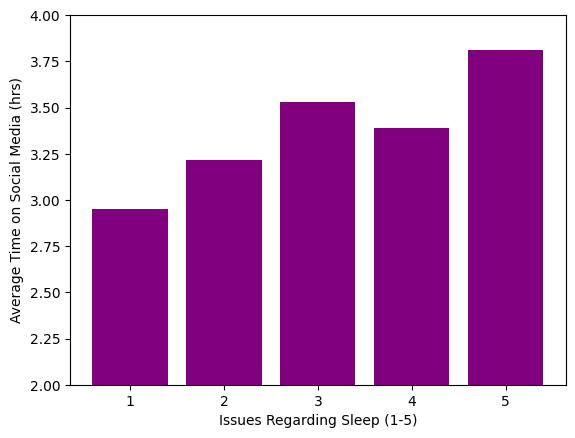

In [12]:
x2= (list(range(1,6)))
y2 = means_array
plt.bar(x2,y2, color="purple")
plt.xlabel("Issues Regarding Sleep (1-5)")
plt.ylim(2,4)
plt.ylabel("Average Time on Social Media (hrs)")
plt.show()

## Social Media and Mental Health 

In [13]:
# Screen_Time vs (Depression , Worries, Compare, Feel, Daily_Interest)

In [14]:
#calculate total mental health score

print(len(df))
mental_health = df["Depression"] + df["Worries"] + df["Compare"] + df["Feel"] + df["Daily_Interest"]
mental_health

481


0      16
1      20
2      17
3      18
4      19
       ..
476    16
477    18
478    12
479    17
480    11
Length: 481, dtype: int64

In [15]:
mental = pd.DataFrame({"Mental" : mental_health})
mental_screen = pd.concat([mental,screen["Screen_Time"]],axis=1)
mental_screen.head()


,Mental,Screen_Time
0,16,2.5
1,20,5.5
2,17,3.5
3,18,5.5
4,19,2.5


In [16]:
unique_screen_2 = screen["Screen_Time"].unique()
mental_means = []
for i in range(len(unique_screen_2)):  
    mental_means.append(mental_screen[mental_screen["Screen_Time"]==unique_screen_2[i]].mean()[0])
print(mental_means)
#print(screen["Screen_Time"].unique())

[15.05940594059406, 17.310344827586206, 16.537634408602152, 11.235294117647058, 13.8, 16.19402985074627]


[3.01188119 3.46206897 3.30752688 2.24705882 2.76       3.23880597]
[2.5 5.5 3.5 0.5 1.5 4.5] [3.01188119 3.46206897 3.30752688 2.24705882 2.76       3.23880597]


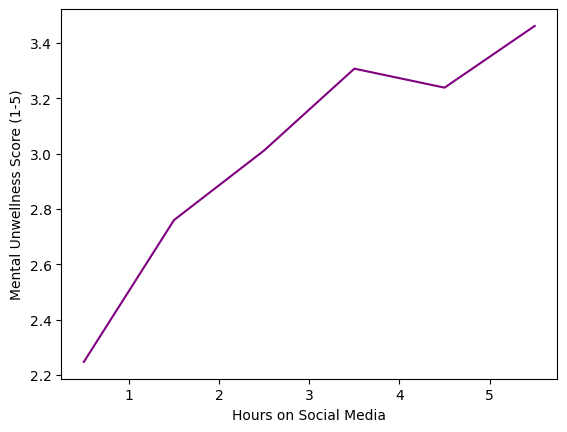

In [17]:
x2= np.array(unique_screen_2)
y2 = np.array(mental_means)/5  # divide by 5 to get a score between 1-5
print(y2)
print(x2, y2)
order = [3,4,0,2,5,1]
x2= x2[order]
y2 = y2[order]
plt.plot(x2,y2, color="purple")
plt.xlabel("Hours on Social Media")
plt.ylabel("Mental Unwellness Score (1-5)")
plt.show()


## Distractability

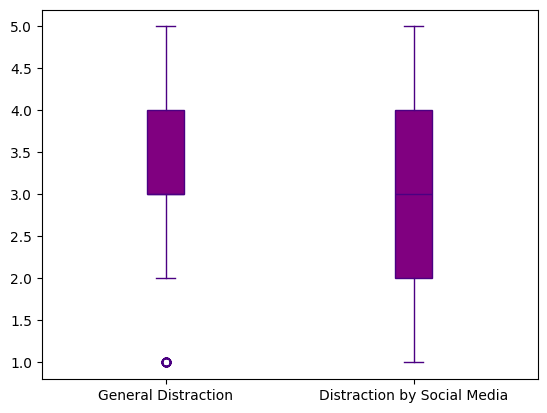

In [29]:
# Simply comparing general distractability vs Social Media Distractibility

plt.boxplot([df["Distract"],df["SM_Distract"]], labels = ["General Distraction", "Distraction by Social Media"],
           patch_artist = True, 
            boxprops=dict(facecolor="purple", color="indigo"),
            capprops=dict(color="indigo"),
            whiskerprops=dict(color="indigo"),
            flierprops=dict(color="indigo", markeredgecolor="indigo"),
            medianprops=dict(color="indigo"))
plt.show()

## Further Potential Research

- Addiction:
  Can look at how many are "addicted" by looking at variables Doom_Scroll + Validation_Seeking + Restlessness + SM_Distract + Screen_Time
- Look at how gender affects social media usage and poor mental health outcomes
- Look at a few countries and cluster data on social media usage and/or mental health